In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
x_train = pd.read_csv('/content/drive/MyDrive/Reescalado/RB.csv').iloc[:,1:]
x_test = pd.read_csv('/content/drive/MyDrive/Reescalado/UB.csv').iloc[:,1:]

In [3]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [5]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [6]:
l_1 = x_train.iloc[:,0:3].values.tolist()
l_2 = x_train.iloc[:,3:6].values.tolist()
l_3 = x_train.iloc[:,6:9].values.tolist()
l_4 = x_train.iloc[:,9:12].values.tolist()
l_5 = x_train.iloc[:,12:15].values.tolist()
l_6 = x_train.iloc[:,15:18].values.tolist()
l_7 = x_train.iloc[:,18:21].values.tolist()
l_8 = x_train.iloc[:,21:].values.tolist()

x_train = np.array([l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8])

In [7]:
l_1_ = x_test.iloc[:,0:3].values.tolist()
l_2_ = x_test.iloc[:,3:6].values.tolist()
l_3_ = x_test.iloc[:,6:9].values.tolist()
l_4_ = x_test.iloc[:,9:12].values.tolist()
l_5_ = x_test.iloc[:,12:15].values.tolist()
l_6_ = x_test.iloc[:,15:18].values.tolist()
l_7_ = x_test.iloc[:,18:21].values.tolist()
l_8_ = x_test.iloc[:,21:].values.tolist()

x_test = np.array([l_1_,l_2_,l_3_,l_4_,l_5_,l_6_,l_7_,l_8_])

In [8]:
print(x_train.shape, x_test.shape)

(8, 1981940, 3) (8, 1981940, 3)


In [9]:
x_train = x_train.reshape(1981940, 3, 8)
x_test = x_test.reshape(1981940, 3, 8)

In [39]:
x_train1 = pd.read_csv('/content/drive/MyDrive/Reescalado/Val.csv').iloc[:,1:]

In [40]:
l_1 = x_train1.iloc[:,0:3].values.tolist()
l_2 = x_train1.iloc[:,3:6].values.tolist()
l_3 = x_train1.iloc[:,6:9].values.tolist()
l_4 = x_train1.iloc[:,9:12].values.tolist()
l_5 = x_train1.iloc[:,12:15].values.tolist()
l_6 = x_train1.iloc[:,15:18].values.tolist()
l_7 = x_train1.iloc[:,18:21].values.tolist()
l_8 = x_train1.iloc[:,21:].values.tolist()

x_train1 = np.array([l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8])

In [41]:
x_train1.shape

(8, 118917, 3)

In [42]:
x_train1 = x_train1.reshape(118917, 3, 8)

In [10]:
model = load_model('/content/auto.h5')

In [25]:
predictions = model.predict(x_train)

In [32]:
m = tf.keras.metrics.MeanSquaredError()
RB_error = []
for i in range(1000):
  m.update_state(x_train[i], predictions[i])
  RB_error.append(m.result().numpy())

In [28]:
predictions2 = model.predict(x_test)

In [33]:
UB_error = []
for i in range(1000):
  m.update_state(x_test[i], predictions2[i])
  UB_error.append(m.result().numpy())

In [44]:
predictions3 = model.predict(x_train1)

In [45]:
VAL_error = []
for i in range(1000):
  m.update_state(x_train1[i], predictions3[i])
  VAL_error.append(m.result().numpy())

In [47]:
print(len(RB_error),len(UB_error), len(VAL_error))

1000 1000 1000


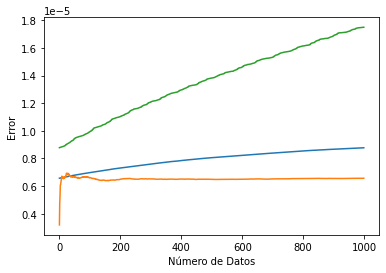

In [54]:
plt.xlabel('Número de Datos')
plt.ylabel('Error')
plt.plot(UB_error)
plt.plot(RB_error)
plt.plot(VAL_error)
